# Sentiment Analysis on Genshin Reviews

This notebook performs sentiment analysis on Genshin reviews to classify them as positive or negative.

In [19]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [5]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jose-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jose-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jose-\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
# Load the CSV file
file_path = 'genshin_review.csv'
df = pd.read_csv(file_path)

In [23]:
# Display the first few rows of the dataframe
df.head()

,review,rating
0,Absolute Masterpiece i hate the people who gav...,5
1,amazing but the fandom isn't amazing,5
2,Very nice,5
3,Give me gambling money (primo gems),4
4,"This is one my first Open World RPG games, and...",4


In [24]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess text
df['cleaned_review'] = df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(re.sub(r'[^\w\s]', '', x.lower())) if word not in stopwords.words('english')]))

# Display the first few rows of the dataframe with the cleaned reviews
df.head()

,review,rating,cleaned_review
0,Absolute Masterpiece i hate the people who gav...,5,absolute masterpiece hate people gave beautifu...
1,amazing but the fandom isn't amazing,5,amazing fandom isnt amazing
2,Very nice,5,nice
3,Give me gambling money (primo gems),4,give gambling money primo gem
4,"This is one my first Open World RPG games, and...",4,one first open world rpg game think never love...


In [25]:
# Apply sentiment analysis to the cleaned review column
df['sentiment'] = df['cleaned_review'].apply(lambda x: 'Positive' if TextBlob(x).sentiment.polarity >= 0 else 'Negative')

# Display the first few rows of the dataframe with the sentiment
df.head()

,review,rating,cleaned_review,sentiment
0,Absolute Masterpiece i hate the people who gav...,5,absolute masterpiece hate people gave beautifu...,Negative
1,amazing but the fandom isn't amazing,5,amazing fandom isnt amazing,Positive
2,Very nice,5,nice,Positive
3,Give me gambling money (primo gems),4,give gambling money primo gem,Positive
4,"This is one my first Open World RPG games, and...",4,one first open world rpg game think never love...,Positive


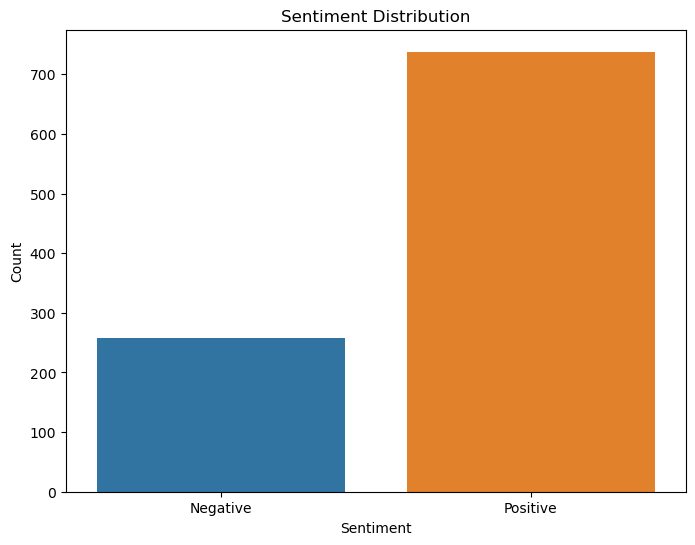

In [28]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="sentiment")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Rating Distribution

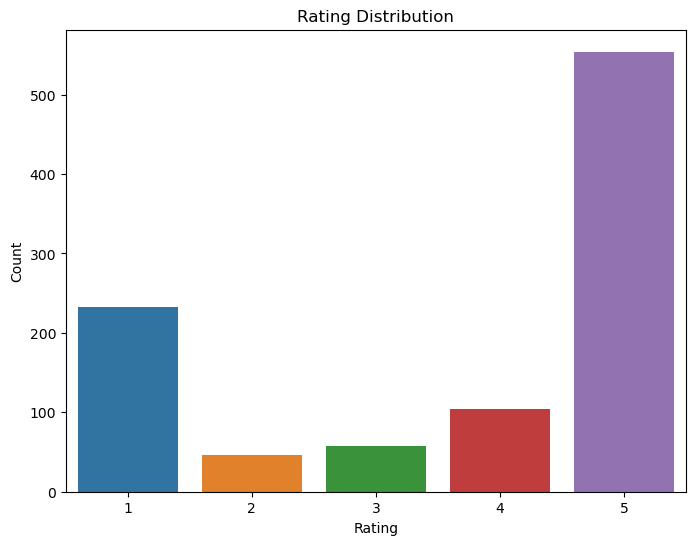

In [26]:
# Plot rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="rating")
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()